In [30]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd


url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={}%ED%9A%8C+%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8"
starting = 1
ending = 1000

columns = ["#1","#2","#3","#4", "#5","#6","Bonus"]
games = []
data = []

for i in range(starting, ending+1):
    url_number = url.format(i)
    
    res = requests.get(url_number)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml")
    games.append(i)
    numbers = []
    for x in soup.find_all(class_ = "ball"):
        numbers.append(x.text)
    data.append(numbers) 

df = pd.DataFrame(data = data, index = games, columns = columns)
df
df.to_excel("lotto1-1000.xlsx")

HTTPError: 403 Client Error: Forbidden for url: https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=952%ED%9A%8C+%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8

In [31]:
df = pd.DataFrame(data = data, index = games, columns = columns)
df
df.to_excel("lotto1-1000.xlsx")

In [32]:
for i in range(952, 1001):
    url_number = url.format(i)
    
    res = requests.get(url_number)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml")
    games.append(i)
    numbers = []
    for x in soup.find_all(class_ = "ball"):
        numbers.append(x.text)
    data.append(numbers) 

HTTPError: 403 Client Error: Forbidden for url: https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=953%ED%9A%8C+%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8

In [33]:
df

,#1,#2,#3,#4,#5,#6,Bonus
1,10,23,29,33,37,40,16
2,9,13,21,25,32,42,2
3,11,16,19,21,27,31,30
4,14,27,30,31,40,42,2
5,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
947,3,8,17,20,27,35,26
948,13,18,30,31,38,41,5
949,14,21,35,36,40,44,30
950,3,4,15,22,28,40,10


In [37]:
df.describe()

,#1,#2,#3,#4,#5,#6,Bonus
count,951,951,951,951,951,951,951
unique,28,35,38,38,35,27,45
top,1,8,20,31,34,45,43
freq,132,62,54,50,63,133,33


In [44]:
data.count("1")

0

In [46]:
arr = np.array(data)

In [48]:
arr = arr.astype(np.int)

C:\Users\kijun\AppData\Local\Temp\ipykernel_2576\4005990102.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = arr.astype(np.int)


In [54]:
arr = arr.flatten()

In [56]:
len(arr)

6664

In [57]:
arr

array([10, 23, 29, ..., 33, 41, 38])

In [61]:
values, counts =np.unique(arr,return_counts=True)

In [62]:
values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [63]:
counts

array([159, 151, 151, 159, 146, 146, 146, 146, 119, 155, 149, 160, 161,
       152, 145, 147, 162, 154, 148, 156, 147, 123, 130, 148, 139, 151,
       165, 133, 127, 143, 151, 133, 158, 163, 142, 145, 149, 154, 158,
       153, 130, 144, 174, 144, 148], dtype=int64)

<BarContainer object of 45 artists>

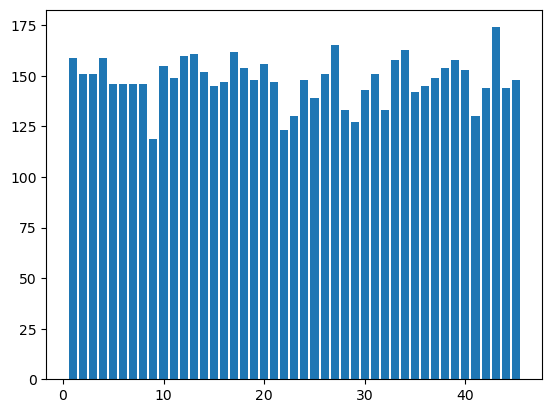

In [66]:
import matplotlib.pyplot as plt
plt.bar(x = values, height = counts)

In [69]:
data = [[int(x) for x in rows] for rows in data]

In [70]:
df = pd.DataFrame(data = data, index = games, columns = columns)

In [74]:
a=np.sum(df,axis= 1)

(array([  6.,  25.,  82., 168., 231., 204., 157.,  58.,  18.,   3.]),
 array([ 60. ,  80.8, 101.6, 122.4, 143.2, 164. , 184.8, 205.6, 226.4,
        247.2, 268. ]),
 <BarContainer object of 10 artists>)

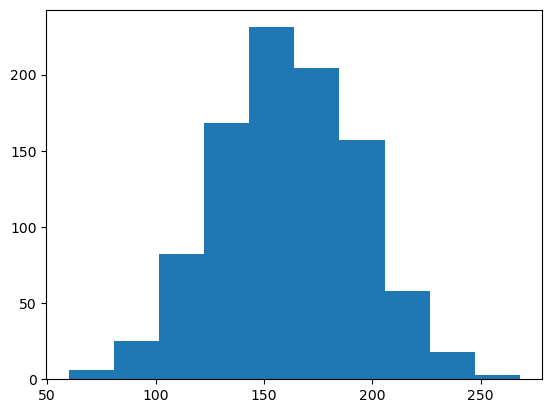

In [79]:
plt.hist(x = a)

In [80]:
values, counts =np.unique(a,return_counts=True)

<BarContainer object of 156 artists>

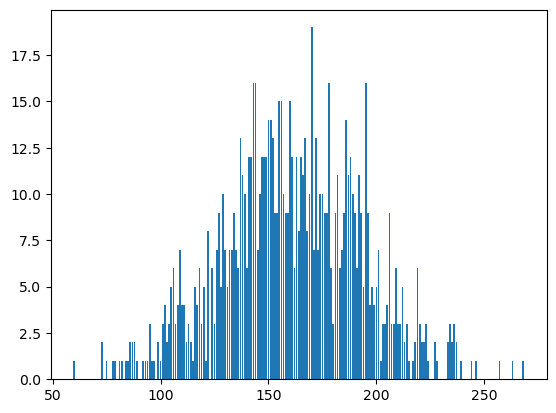

In [81]:
plt.bar(x = values, height = counts)